In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# License: MIT
# June 2024

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [3]:
from sklearn.datasets import fetch_olivetti_faces

X, y = fetch_olivetti_faces(return_X_y=True)

In [4]:
X.shape

(400, 4096)

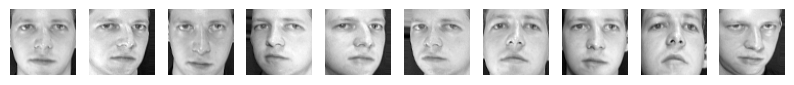

In [5]:
n_faces = 10
fig, axes = plt.subplots(1, n_faces, figsize=(10, 10))
image_shape = (64, 64)

for ax, image in zip(axes, X[:n_faces]):
    ax.imshow(image.reshape(image_shape), cmap='gray')
    ax.axis('off')
    
plt.savefig('figures/olivetti_faces.pdf', bbox_inches='tight')

Create the Training and Test Sets

In [6]:
# Separate images of individuals not seen during training
train = X[y < 35]  # Training set: Individuals 0 to 34
test = X[y >= 35]  # Test set: Individuals 35 to 39

In [7]:
n_pixels = X.shape[1]
n_half = n_pixels // 2

# Upper half of the faces used as input
X_train = train[:, :n_half]
X_test = test[:, :n_half]

# Lower half of the faces used as output
Y_train = train[:, n_half:]
Y_test = test[:, n_half:]

Fit a Decision Tree Model

In [8]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [9]:
model.score(X_train, Y_train)

1.0

In [10]:
model.score(X_test, Y_test)

-0.682253718195512

Plot the Reconstructed Faces

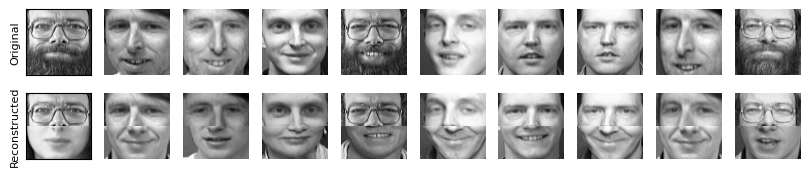

In [11]:
# Predict the lower half of the faces in the test set
Y_test_pred = model.predict(X_test)

# Plotting
n_faces = 10
fig, axes = plt.subplots(2, n_faces, figsize=(10, 2))
np.random.seed(42)
face_ids = np.random.choice(len(X_test), size=n_faces, replace=False)

for i, face_id in enumerate(face_ids):
    original_face = test[face_id]
    reconstructed_face = np.hstack((X_test[face_id], Y_test_pred[face_id]))    
    
    axes[0, i].imshow(original_face.reshape(image_shape), cmap='gray')
    axes[1, i].imshow(reconstructed_face.reshape(image_shape), cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].axis('off')   
                             
# Add labels to the first subplot of each row with visible y-axis
axes[0, 0].axis('on')
axes[0, 0].set_ylabel('Original', size=8)
axes[0, 0].set_xticks([])
axes[0, 0].set_yticks([])
        
axes[1, 0].axis('on')
axes[1, 0].set_ylabel('Reconstructed', size=8)
axes[1, 0].set_xticks([])
axes[1, 0].set_yticks([])
                             
plt.savefig('figures/olivetti_reconstructed_faces.pdf', bbox_inches='tight')